In [ ]:
# Xiaoxin Zhou 1003549742

In [14]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# 1. Read data from xlsx file 
data_path = 'INF2178_A2_data.xlsx'
data = pd.read_excel(data_path)
data

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,1059,14492,The Neighbourhood Group Downsview Child Care,Non Profit Agency,2829 KEELE ST,M3M 2G7,6,Public Elementary School,Downsview Public School,0,0,0,52,60,112,Y,Y
1059,1060,14496,Lawrence Park School,Non Profit Agency,2180 BAYVIEW AVE,M4N 3K7,15,Other,NaN,0,25,35,0,0,60,N,N
1060,1061,14497,The Munchkin Manor Daycare & Early Learning Ce...,Non Profit Agency,525 BLOOR ST E,M4W 1J1,13,Other,Place Of Worship,0,25,24,0,0,49,N,N
1061,1062,14501,Columbus Early Learning Centres - Regina Mundi,Non Profit Agency,60 PLAYFAIR AVE,M6B 2P9,8,Catholic Elementary School,Regina Mundi Catholic School,0,0,0,26,30,56,Y,Y


In [3]:
# remove not useful features
columns_of_interest = ['AUSPICE', 'ward', 'bldg_type', 'IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE', 'subsidy', 'cwelcc_flag']
cleaned_data = data[columns_of_interest]
# check have null or not
quantitative_summary = cleaned_data.describe()
quantitative_summary

,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,12.511759,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,7.032050,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,6.000000,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,12.000000,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,19.000000,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,25.000000,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

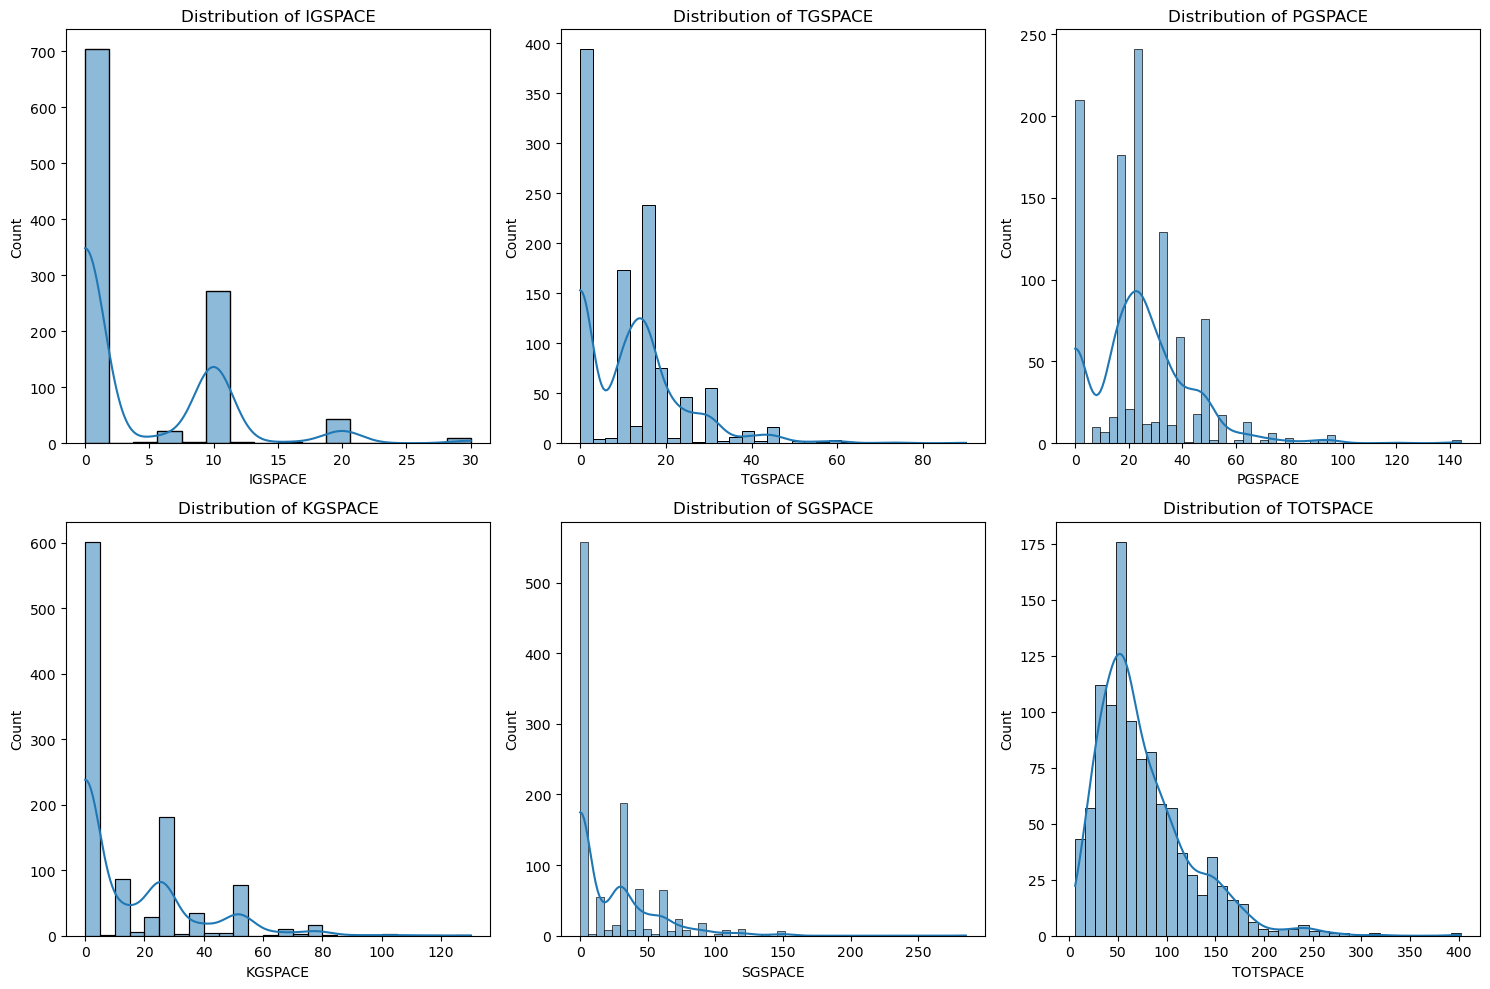

In [4]:
# Check the distribution of the quantitative variables using histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(cleaned_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

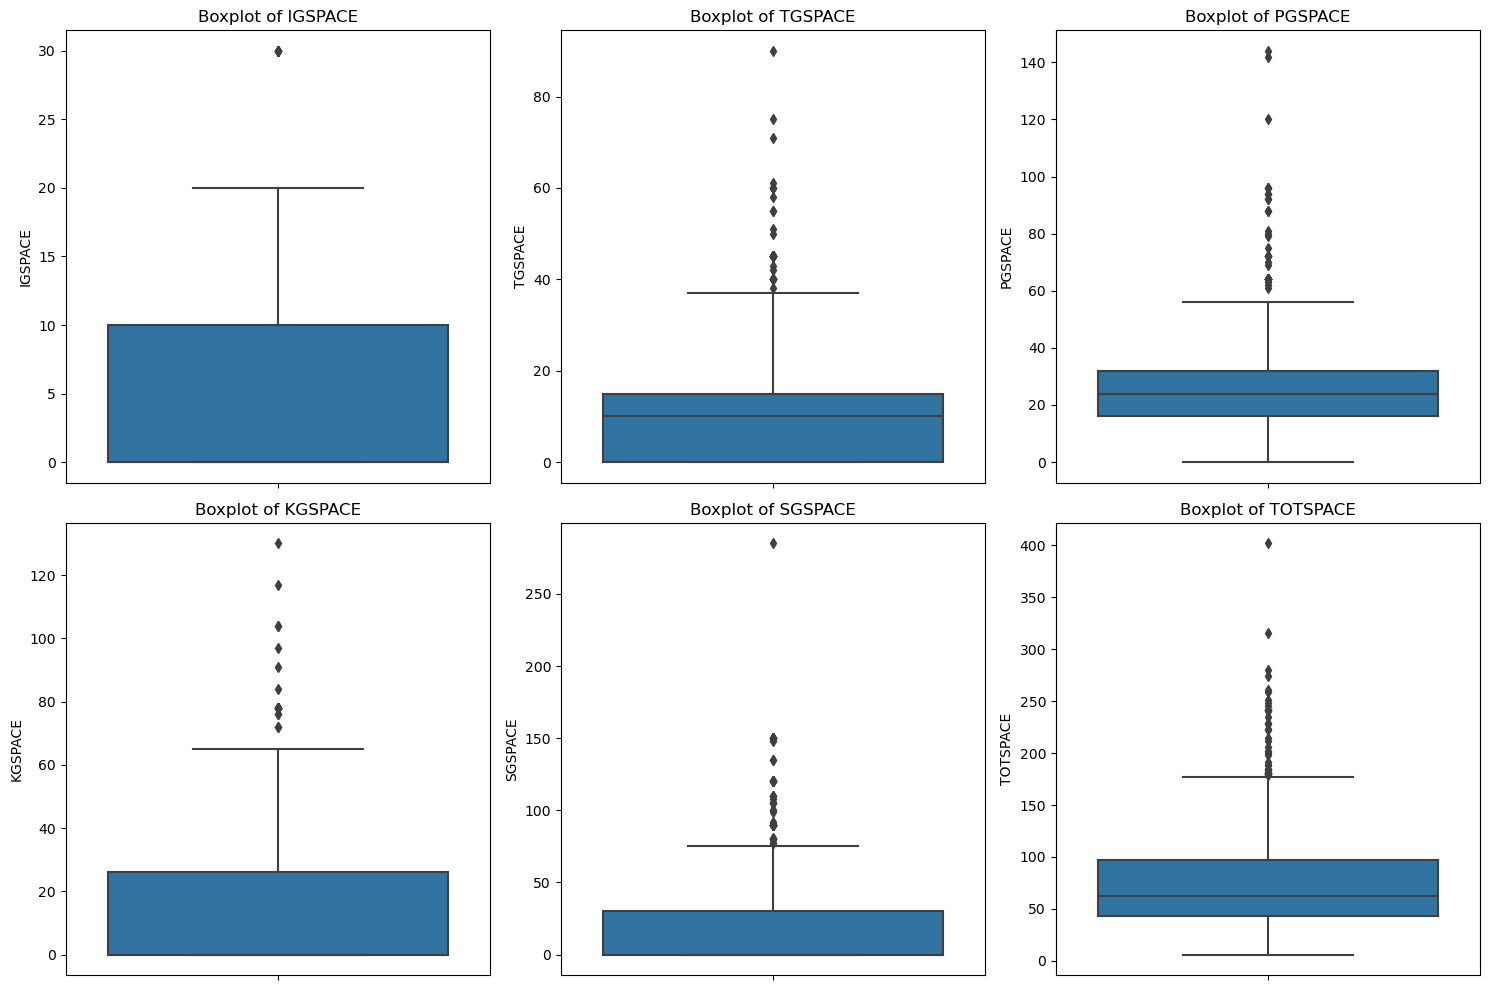

In [5]:
# Check for outliers using boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=cleaned_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [6]:
# remove outliers by IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal function to each space type column
for space_type in ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']:
    data = remove_outliers(data, space_type)

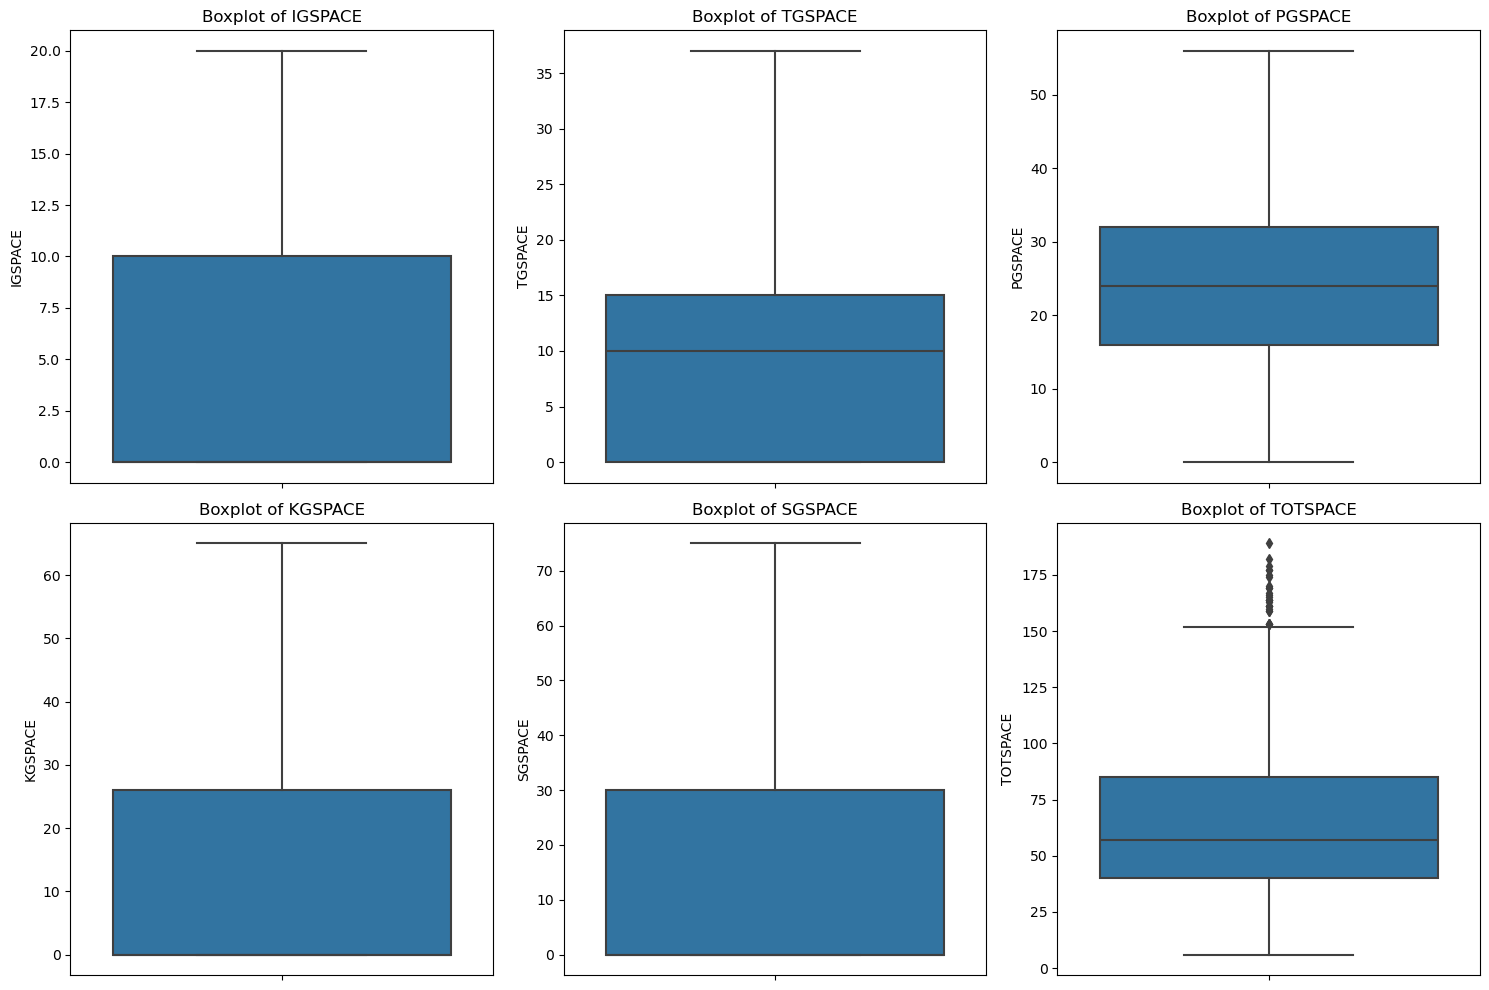

In [7]:
# show boxplots after removel
plt.figure(figsize=(15, 10))
for i, column in enumerate(['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE'], start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# One-Way ANOVA

In [13]:
# First question
# in order to process the ANOVA we need to group IGSPACE TGSPACE PGSPACE KGSPACE SGSPACE
anova_result = stats.f_oneway(data['IGSPACE'], data['TGSPACE'], data['PGSPACE'], data['KGSPACE'], data['SGSPACE'])
print("ANOVA result for TOTSPACE among wards:", anova_result)

ANOVA result for TOTSPACE among wards: F_onewayResult(statistic=218.9536487483347, pvalue=1.8354486402613428e-172)


In [17]:
# Second Question
# Convert 'cwelcc_flag' and 'subsidy' to categories indicating 'Y' or not 'Y' (assuming 'N' for simplicity)
data['licensed'] = data['cwelcc_flag'].apply(lambda x: 'Y' if x == 'Y' else 'N')
data['subsidy_available'] = data['subsidy'].apply(lambda x: 'Y' if x == 'Y' else 'N')
formula = 'TOTSPACE ~ C(licensed) * C(subsidy_available)'
model = ols(formula, data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(licensed),9.312739e+03,1.0,8.234504,4.203142e-03
C(subsidy_available),7.198723e+04,1.0,63.652500,4.342758e-15
C(licensed):C(subsidy_available),8.161992e+02,1.0,0.721699,3.958055e-01
Residual,1.052906e+06,931.0,NaN,NaN
